# Test of Preprocessing Methods

To test the performance of each method the method are compared in time complexity and accuracy.

In [1]:
import cv2
import numpy as np
import glob
from matplotlib import pyplot as plt

In [2]:
# Import data 
potato_fil = glob.glob('/mnt/sdb/Robtek/6semester/Bachelorproject/BSc-PRO/potato_and_catfood/train/potato/*.jpg')
potato_images = [cv2.imread(img) for img in potato_fil]

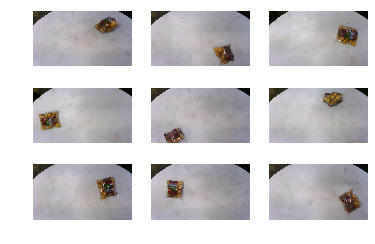

In [3]:
# Convert potato_image from BGR to RGB
potato_img_rgb = []
for img in potato_images:
    potato_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    potato_img_rgb.append(potato_rgb)
    
# Plot images of potatoes
plt.figure(1); plt.title('Potato images')

i = 1
for img in potato_img_rgb:
    plt.subplot(3, 3, i); plt.axis('off'); plt.imshow(img)
    
    i += 1
    if (i > 9):
        break
    
plt.show()

## Time Complexity

To test the time complexity the OpenCV function [getTickCount() and getTickFrequency()](https://docs.opencv.org/3.4/db/de0/group__core__utils.html#gae73f58000611a1af25dd36d496bf4487) is used.

- getTickCount: returns the number of clock-cycles after a reference event to the moment this function is called.

- getTickFrequency: returns the frequency of clock-cycles, or the number of clock-cylces per second.

Example code:

```python
e1 = cv2.getTickCount()
# your code here
e2 = cv2.getTickCount()
time = (e2 - e1) / cv2.getTickFrequency()
```

### Background Models

In [4]:
from background_models import background_models as bm

# import background imageg
background_img = bm.run_avg('/mnt/sdb/Robtek/6semester/Bachelorproject/BSc-PRO/images_1280x720/baggrund/bevægelse')

list_bm = []
roi_bm = []
for img in potato_images:
    # Get number of clock-cycles
    e1 = cv2.getTickCount()
    roi = bm.background_sub(img, background_img)
    e2 = cv2.getTickCount()
    
    # Calculate time
    time = (e2 - e1) / cv2.getTickFrequency()
    
    # Add to list
    list_bm.append([e1, e2, e2-e1, time])
    roi_bm.append(roi)

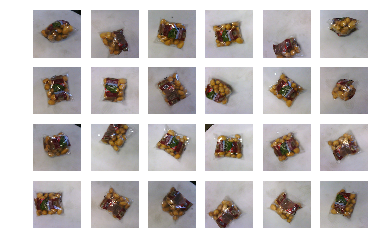

In [5]:
# Convert potato_image from BGR to RGB
bm_img_rgb = []
for img in roi_bm:
    bm_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    bm_img_rgb.append(bm_rgb)
    
# Plot images of potatoes
i = 1
for img in bm_img_rgb:
    plt.subplot(4, 6, i); plt.axis('off'); plt.imshow(img)
    
    i += 1
    if (i > 24):
        break

plt.show()

### Template Matching

In [6]:
from template_matching import template_matching as tm

template = cv2.imread('/mnt/sdb/Robtek/6semester/Bachelorproject/BSc-PRO/preprocessing/template_matching/template_tm2.jpg')

list_tm = []
roi_tm = []
for img in potato_images:
    # Get number of clock-cycles
    e1 = cv2.getTickCount()
    roi = tm.templateMatch(template, img)
    e2 = cv2.getTickCount()
    
    # Calculate time
    time = (e2 - e1) / cv2.getTickFrequency()
    
    # Add to list
    list_tm.append([e1, e2, e2-e1, time])
    roi_tm.append(roi)

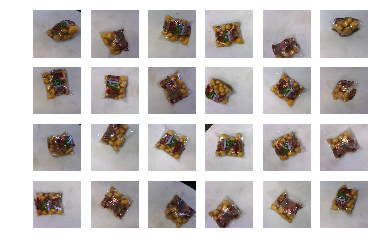

In [7]:
# Convert potato_image from BGR to RGB
tm_img_rgb = []
for img in roi_tm:
    tm_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    tm_img_rgb.append(tm_rgb)
    
# Plot images of potatoes
i = 1
for img in tm_img_rgb:
    plt.subplot(4, 6, i); plt.axis('off'); plt.imshow(img)
    
    i += 1
    if (i > 24):
        break

plt.show()

### Chamfer matching

In [8]:
# Create distance map from template
tmp_bw = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
_, tmp_bw = cv2.threshold(tmp_bw, 40, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
tmp_dist = cv2.distanceTransform(tmp_bw, cv2.DIST_L2, 3)

# Test time complexity and store clock-cylces
list_cm = []
roi_cm = []
for img in potato_images:
    # Get number of clock-cycles
    e1 = cv2.getTickCount()
    roi = tm.chamferMatch(tmp_dist, img)
    e2 = cv2.getTickCount()
    
    # Calculate time
    time = (e2 - e1) / cv2.getTickFrequency()
    
    # Add to list
    list_cm.append([e1, e2, e2-e1, time])
    roi_cm.append(roi)

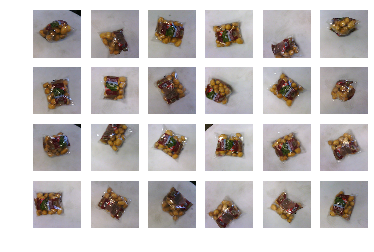

In [9]:
# Convert potato_image from BGR to RGB
cm_img_rgb = []
for img in roi_cm:
    cm_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cm_img_rgb.append(cm_rgb)
    
# Plot images of potatoes
i = 1
for img in cm_img_rgb:
    plt.subplot(4, 6, i); plt.axis('off'); plt.imshow(img)
    
    i += 1
    if (i > 24):
        break

plt.show()

### Back-projection

In [10]:
from backprojection import backprojection as bp

roi_img = cv2.imread('/mnt/sdb/Robtek/6semester/Bachelorproject/BSc-PRO/preprocessing/backprojection/template_bp.jpg', 1)
roi_hsv = cv2.cvtColor(roi_img, cv2.COLOR_BGR2HSV)
roi_hist = cv2.calcHist([roi_hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

list_bp = []
roi_bp = []
for img in potato_images:
    # Get number of clock-cycles
    e1 = cv2.getTickCount()
    roi = bp.backproject(roi_hist, img)
    e2 = cv2.getTickCount()
    
    # Calculate time
    time = (e2 - e1) / cv2.getTickFrequency()
    
    # Add to list
    list_bp.append([e1, e2, e2-e1, time])
    roi_bp.append(roi)

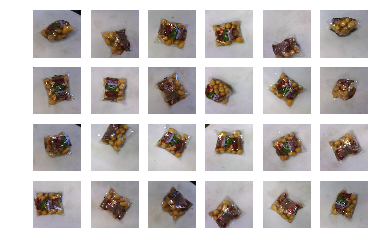

In [11]:
# Convert potato_image from BGR to RGB
bp_img_rgb = []
for img in roi_bp:
    bp_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    bp_img_rgb.append(bp_rgb)
    
# Plot images of potatoes
i = 1
for img in bp_img_rgb:
    plt.subplot(4, 6, i); plt.axis('off'); plt.imshow(img)
    
    i += 1
    if (i > 24):
        break

plt.show()

### Comparison

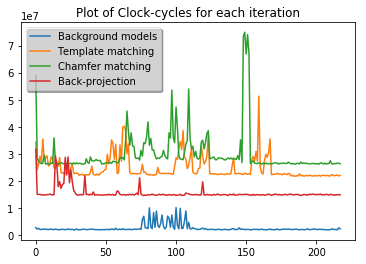

In [12]:
# ---------------------------------------------
# Plot number of clock-cycles foreach method
# ---------------------------------------------

plt.figure(5)
plt.title('Plot of Clock-cycles for each iteration')

# Background models
i = 0; x_bm = []; y_bm = []
for l in list_bm:
    x_bm.append(i); i += 1
    y_bm.append(l[2])
plt.plot(x_bm, y_bm, label='Background models')

# Template matching
i = 0; x_tm = []; y_tm = []
for l in list_tm:
    x_tm.append(i); i += 1
    y_tm.append(l[2])
plt.plot(x_tm, y_tm, label='Template matching')

# Chamfer matching
i = 0; x_cm = []; y_cm = []
for l in list_cm:
    x_cm.append(i); i += 1
    y_cm.append(l[2])
plt.plot(x_cm, y_cm, label='Chamfer matching')

# Back-projection
i = 0; x_bp = []; y_bp = []
for l in list_bp:
    x_bp.append(i); i += 1
    y_bp.append(l[2])
plt.plot(x_bp, y_bp, label='Back-projection')

leg = plt.legend(loc='best', ncol=1, shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)

plt.show()

In [13]:
print('# ---------------------------------------')
print('# Average clock-cycles for each method')
print('# --------------------------------------- \n')

# Background models
avg_clock_cycle = 0; avg_time = 0
for l in list_bm:
    avg_clock_cycle += l[2]; avg_time += l[3]
avg_clock_cycle /= len(list_bm)
avg_time_ms = 1000.0 * avg_time / len(list_bm)
print('Background models \n Average clock cycle: ', avg_clock_cycle, '\n Average time: ', avg_time_ms, '[ms] \n')

# Template matching
avg_clock_cycle = 0; avg_time = 0
for l in list_tm:
    avg_clock_cycle += l[2]; avg_time += l[3]
avg_clock_cycle /= len(list_tm)
avg_time_ms = 1000.0 * avg_time / len(list_tm)
print('Template matching \n Average clock cycle: ', avg_clock_cycle, '\n Average time: ', avg_time_ms, '[ms] \n')

# Chamfer matching
avg_clock_cycle = 0; avg_time = 0
for l in list_cm:
    avg_clock_cycle += l[2]; avg_time += l[3]
avg_clock_cycle /= len(list_cm)
avg_time_ms = 1000.0 * avg_time / len(list_cm)
print('Chamfer matching \n Average clock cycle: ', avg_clock_cycle, '\n Average time: ', avg_time_ms, '[ms] \n')

# Back-projection
avg_clock_cycle = 0; avg_time = 0
for l in list_bp:
    avg_clock_cycle += l[2]; avg_time += l[3]
avg_clock_cycle /= len(list_bp)
avg_time_ms = 1000.0 * avg_time / len(list_bp)
print('Back-projection \n Average clock cycle: ', avg_clock_cycle, '\n Average time[ms]: ', avg_time_ms, '[ms]')

# ---------------------------------------
# Average clock-cycles for each method
# --------------------------------------- 

Background models 
 Average clock cycle:  2538238.3073394494 
 Average time:  2.538238307339449 [ms] 

Template matching 
 Average clock cycle:  24831242.059633028 
 Average time:  24.831242059633038 [ms] 

Chamfer matching 
 Average clock cycle:  29944779.220183488 
 Average time:  29.944779220183502 [ms] 

Back-projection 
 Average clock cycle:  15544606.073394496 
 Average time[ms]:  15.544606073394489 [ms]


## Classification performance

- The number of true positives (TP): The number of samples that have been correctly identified as being the class being sought
- The number of false positives (FP): The number of samples that have been incorretly identified as being the class being sought
- The number of true negatives (TN): The number of samples that have been correctly identified as not being the class being sought
- The number of false negatives (FN): The number of samples that have been inccorectly identified as not being the class being sought
    
$$ Total\ Samples = TP + FP + TN + FN $$

Recall is the percentage of the objects being sought which has been succesfully located. 
$$Recall = \frac{TP}{TP + FN} $$

Precision is the percentage of the positive classification which are correct. 
$$ Precision = \frac{TP+TN}{Total\ Samples} $$ 

Specificity is the percentage of the negative classifications which are correct. 
$$ Specificity = \frac{TN}{FP+TN} $$

### Precision

In [1]:
# import data
import localization_result as result

data_bm = result.data['background_model']
data_tm = result.data['template_matching']
data_cm = result.data['chamfer_matching']
data_bp = result.data['backprojection']

In [4]:
print('# -------------------------')
print('# Precision for each method')
print('# ------------------------- \n')

total = 218

# Background model
avg_bm = sum(data_bm)
avg_bm = (avg_bm / total) * 100
print('Background model \n Positive localization: ', avg_bm, '\n')

# Template mathcing
avg_tm = sum(data_tm)
avg_tm = (avg_tm / total) * 100
print('Template matching \n Positive localization: ', avg_tm, '\n')

# Background model
avg_cm = sum(data_cm)
avg_cm = (avg_cm / total) * 100
print('Chamfer matching \n Positive localization: ', avg_cm, '\n')

# Background model
avg_bp = sum(data_bp)
avg_bp = (avg_bp / total) * 100
print('Back-projection \n Positive localization: ', avg_bp)

# -------------------------
# Precision for each method
# ------------------------- 

Background model 
 Positive localization:  98.73853211009175 

Template matching 
 Positive localization:  99.08256880733946 

Chamfer matching 
 Positive localization:  99.54128440366972 

Back-projection 
 Positive localization:  99.77064220183486
